### Import the Model

In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [44]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [45]:
#!pip install git+https://github.com/tensorflow/docs

In [46]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\krish\\.keras\\datasets\\auto-mpg.data'

In [47]:
column_names = ["MPG","Cyclinders","Displacement","Horsepower","Weight",
               "Acceleration","Model_year","Origin"]
raw_dataset = pd.read_csv(dataset_path,names=column_names,na_values='?',
                         comment="\t",sep=" ",skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cyclinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [48]:
dataset.isna().sum()

MPG             0
Cyclinders      0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_year      0
Origin          0
dtype: int64

In [49]:
# The "Origin" Column is really Categorical, not numeric.
# So convert that to one hot
dataset.Origin = dataset.Origin.map({1: "USA", 2: "Europe", 3: "Japan"})

In [50]:
dataset.head(2)

,MPG,Cyclinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA


In [51]:
dataset = pd.get_dummies(dataset,prefix=" ",prefix_sep=" ")
dataset.tail()

,MPG,Cyclinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [52]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

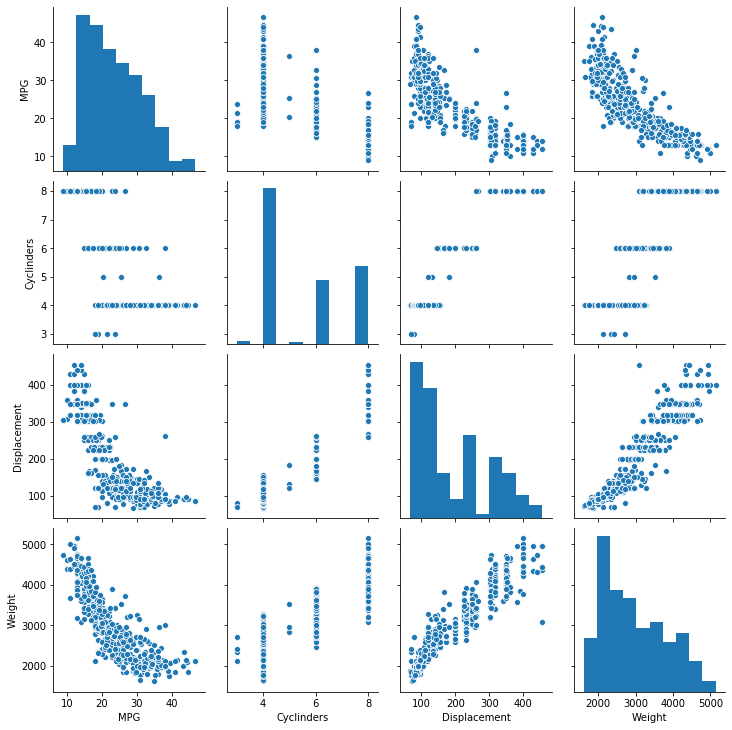

In [53]:
sns.pairplot(dataset[["MPG", "Cyclinders", "Displacement", "Weight"]])

In [54]:
train_stat = train_dataset.describe()
train_stat.pop('MPG')
train_stat = train_stat.T

In [55]:
train_stat

,count,mean,std,min,25%,50%,75%,max
Cyclinders,318.0,5.427673,1.682941,3.0,4.00,4.0,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.25,151.0,259.50,455.0
Horsepower,313.0,104.067093,38.674662,46.0,75.00,92.0,120.00,230.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.25,2792.5,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.90,15.5,17.30,24.8
Model_year,318.0,75.946541,3.705266,70.0,73.00,76.0,79.00,82.0
Europe,318.0,0.163522,0.370424,0.0,0.00,0.0,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.00,0.0,0.00,1.0
USA,318.0,0.641509,0.480313,0.0,0.00,1.0,1.00,1.0


In [58]:
##  Split Features from labels
#train_label = train_dataset.pop("MPG")
#test_label = test_dataset.pop("MPG")

In [59]:
#Normalize the data
def norm(x):
    return (x - train_stat["mean"])/train_stat["std"]
norm_train_data = norm(train_dataset)
norm_test_data  = norm(test_dataset)

### Build the Model 
##### Tensorlfow 
here we will use Sequential Model from tensorflow keras.


In [78]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu",input_shape = [len(train_dataset.keys())]),
        layers.Dense(64,activation="relu"),
        layers.Dense(1)
    ])
    
    optimizer =tf.keras.optimizers.RMSprop(0.01),
    model.compile(loss = "mse",
                  optimizer= optimizer,
                  metrics = ["mae",'mse'])
    return model
                  

In [79]:
model = build_model()

In [80]:
# Inspect the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [81]:
example_batch = norm_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.10866088],
       [-0.01321201],
       [ 0.08318341],
       [ 0.28610784],
       [ 0.09701613],
       [ 0.08298862],
       [ 0.27819678],
       [-0.26670015],
       [ 0.21352735],
       [-0.0193098 ]], dtype=float32)

### Train the model

In [88]:
EPOCHS = 1000

history = model.fit(
  norm_train_data, train_label,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])

ValueError: The `optimizer` in `compile` should be a single optimizer.